#Case Study

In the hospitality business, ensuring the availability of hotel rooms at one time and for some time
The future is very important in optimizing revenue. Information regarding availability
Accurate and actual rooms can prevent the hotel from various losses, such as
caused by guests canceling orders or not checking in on arrival.

#Business Understanding

*Predicting Hotel Booking Cancellation. Is a machine learning classification project that will try to predict whether a booking will be cancelled or a booking will not be cancelled using machine learning based on historical data.*

---

#**1. Problem Framing**


1. What business objectives do you want to achieve through this project?

    *The Goals of this  machine learning project is to ```find out the characteristic of customers who cancelled and finding a pattern in cancelled booking by doing an exploratory data analysis. If the hotels have a model to predict if a guest will actually come. This can help a hotel to plan things like personel and food requirements.```*

2. What kind of output will be generated from this project and how will the end user or
stakeholders will take advantage of these outputs?

    *After finding out the characteristics of customers and pattern in cancelled booking, ```stakeholders then can plan things like personel and food requirements in the future to prevent wasting of food and personel resources.```*

3. What machine learning tasks will be performed? (supervised/unsupervised learning,
classification/regression/clustering/dimensionality reduction problems etc.)

    *```Classification``` machine learning model*

4. What performance measures will be used in this project?

    *```Accuracy, classification machine learning model to predict cancellation that has accuracy score around 0.75 - 0.9```*

5. What kind of risks might the prediction error of your model entail?

    *```If the customer is actually staying at the hotel, the personel and food will be shortage and need remapping of that```*

###**Cancellation of hotel bookings has effect the hotel not being able to accurately forecast occupancy within their revenue management, and the trend of cancellation also have causes hotel loss in opportunity cost (unsold room due to cancellation while the resources and food money is wasted)**

#**2. EDA**

In [43]:
!pip install category_encoders

     |████████████████████████████████| 81kB 5.4MB/s 


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from sklearn.impute import SimpleImputer
pd.set_option('display.max_columns', None)
import plotly.express as px
import plotly.graph_objects as go

import datetime as dt
warnings.filterwarnings('ignore')

In [5]:
from google.colab import files
upload = files.upload()

Saving hotel_bookings.csv to hotel_bookings.csv


In [6]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

*There are some columns with null value in the data frame we will need to imputing, and filling some random value and there's huge amount of missing value in the company column this might need to be drop, but we will discover it later on*

In [9]:
df['is_canceled'].value_counts(normalize=True)

0    0.629584
1    0.370416
Name: is_canceled, dtype: float64

*The data is not imbalance so for the accuracy score will be considered as evaluation matrix score*

In [10]:
df['reservation_status'].value_counts()

Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

*the reservation status column will need to be dropped for the machine learning since it has canceled status it will somehow leak the information to the model regarding latest status of a booking and will make the model bias and it wouldn't be useful for predicting for cancelllation since the status only happened after the booking was cancelled or after the customer checked out from the hotel*

##Descriptive Analysis

In [11]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


*there's an adr that's negative, we will do a deeper analysis on this because it's impossible to have a negative daily rate as the hotel there's 0 adult in the data as well we will do a deeper analysis on this because is impossible to have a booking with 0 adult there's a absurdly high amount for the adr with 5400*

In [12]:
df.describe(include = 'O')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


***Almost half of the bookings were made from PRT (assumed Portugal). There is a discrepancy of reserved room type and assigned room type hotel might have room that's not sold to the public. No deposit here might have a reason why cancellation is high (since customer will not have anything to lose in this no deposit case).Most popular room is room type A (we need to check it with the ADR which room type has the average daily rate and what it has to do with the popularity )***

#**3. Data Preparation**

###Cleaning

In [15]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

###Cleaning Children in Dataset


In [17]:
df['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

filliing in the children missing value columns 
since the children mean and median and mode are 0, fill it with 0

In [18]:
df['children'] = df['children'].fillna(0)
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

###Cleaning Country in Dataset

Country column is filled with the most frequent value of the column


In [19]:
df['country'] = df['country'].fillna(df['country'].value_counts().index[0])
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

###Cleaning Agent and Company in Dataset

since there are 334 of unique value in the column agent and inputing it would make the dataset too many variables. In the description mentioned that many nan value in the agent column is booking that made from individual so we will drop the column instead we will drop the company column since it has more than 90% of null value 

In [20]:
df =df.drop(columns = ['agent', 'company'])
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

since the there is no null value anymore in the data, check the outliers 


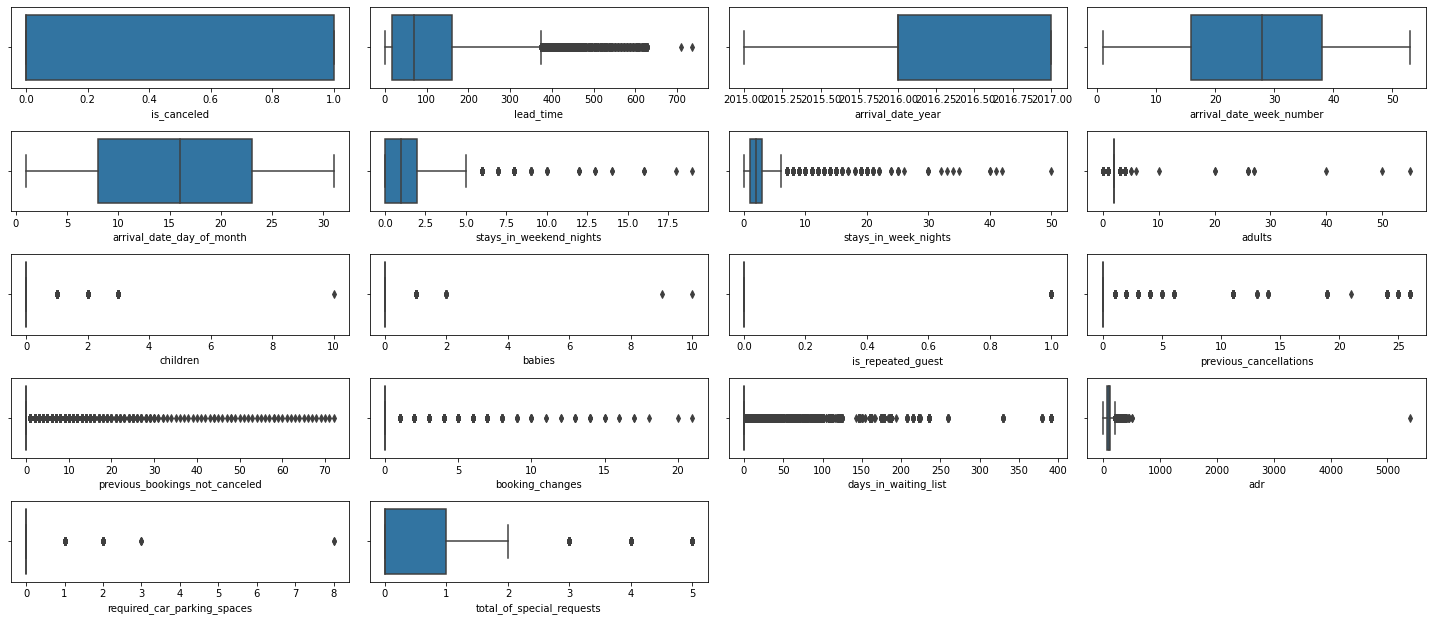

In [21]:
plt.figure(figsize = (20, 10))
x = 1 

for column in df.describe().columns:
    plt.subplot(6,4,x)
    sns.boxplot(df[column])
    x+=1
    
plt.tight_layout()

As visualized in the plots, there are many outliers in many of the columns. we will handle the outliers by binning the columns that has outliers in it and from the box plot there are columns that has a random value like 0 number of adults and negative amount of adr there's one value of adr that's above 5000 and there's only 1 data point since it so random we will drop that one outliers in the adr colummn

###Adult Abnormal Value


It is impossible to have 0 adults to book a hotel room 

In [22]:
df.drop(labels = df[df['adults'] == 0].index, axis = 0, inplace = True)
df[df['adults'] == 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


###ADR Abnormal Value

there are values of adr columns that below 0 since it is impossible for hotel to owe money to the guest 

In [23]:
df[df['adr'] <0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
14969,Resort Hotel,0,195,2017,March,10,5,4,6,2,0.0,0,BB,GBR,Groups,Direct,1,0,2,A,H,2,No Deposit,0,Transient-Party,-6.38,0,0,Check-Out,2017-03-15


In [24]:
df = df.drop(df[df.adr > 5000].index)
df[df['adr']> 5000]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


##Preparation

###Arrival Columns

getting booking Arrival date as Date time object

In [30]:
df['arrival_date'] = df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'] + '-' + df['arrival_date_day_of_month'].astype(str)
df['arrival_date'] = pd.to_datetime(df['arrival_date'])
df['arrival_month'] = df['arrival_date'].dt.month
df['arrival_day'] = df['arrival_date'].dt.day_name()
df['month_year'] = pd.to_datetime(df['arrival_date']).dt.to_period('M')

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month,arrival_day,month_year
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,7,Wednesday,2015-07


###Total Stays Column

getting the total stays column by adding the weekday stays and the weekend stays



In [31]:
df['total_stays'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df[df['total_stays'] == 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month,arrival_day,month_year,total_stays
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0
167,Resort Hotel,0,111,2015,July,28,6,0,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,H,0,No Deposit,0,Transient,0.0,0,2,Check-Out,2015-07-06,2015-07-06,7,Monday,2015-07,0
168,Resort Hotel,0,0,2015,July,28,6,0,0,1,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,H,0,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-06,2015-07-06,7,Monday,2015-07,0
196,Resort Hotel,0,8,2015,July,28,7,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,0,Transient,0.0,0,1,Check-Out,2015-07-07,2015-07-07,7,Tuesday,2015-07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115483,City Hotel,0,15,2017,July,27,6,0,0,1,0.0,0,SC,FRA,Direct,Direct,0,0,0,A,A,0,No Deposit,0,Transient-Party,0.0,0,0,Check-Out,2017-07-06,2017-07-06,7,Thursday,2017-07,0
117701,City Hotel,0,0,2017,August,32,8,0,0,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,1,0,0,A,A,0,No Deposit,0,Transient,0.0,0,0,Check-Out,2017-08-08,2017-08-08,8,Tuesday,2017-08,0
118029,City Hotel,0,0,2017,August,33,14,0,0,2,0.0,0,BB,PRT,Direct,Direct,1,0,0,A,A,0,No Deposit,0,Transient,0.0,0,0,Check-Out,2017-08-14,2017-08-14,8,Monday,2017-08,0
118631,City Hotel,0,78,2017,August,34,23,0,0,1,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,K,7,No Deposit,0,Transient-Party,0.0,0,0,Check-Out,2017-08-23,2017-08-23,8,Wednesday,2017-08,0


this is a little randomness of the data as well since you won't be able to make a booking at the arrival date and checkout on the same day

###Guest, Kids & and Children

we want to see the total guest of the booking by combining the value of adults children and babies and adding the kids in the booking by combiing the children and the babies, because majority of the bookings sites there's no babies option as well

In [32]:
df['guests'] = df['adults'] + df['children'] + df['babies']
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month,arrival_day,month_year,total_stays,guests
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0,2.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07,1,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07,1,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,7,Wednesday,2015-07,2,2.0


In [34]:
df['kids'] = df['children'] + df['babies']
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month,arrival_day,month_year,total_stays,guests,kids
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0,2.0,0.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0,2.0,0.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07,1,1.0,0.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07,1,1.0,0.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,7,Wednesday,2015-07,2,2.0,0.0


###Meal Columnn

In [35]:
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

we can see from here that there's an undefined value from the dataset however from the explanation from the source of the dataset that undifed meal package is same as SC (No Meal Package) so we will replace the undefined to SC

In [36]:
df['meal'] = df['meal'].str.replace('Undefined', 'SC')
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC'], dtype=object)

In [37]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,arrival_month,total_stays,guests,kids
count,118986.000000,118986.000000,118986.000000,118986.000000,118986.000000,118986.000000,118986.000000,118986.000000,118986.000000,118986.000000,118986.000000,118986.000000,118986.000000,118986.000000,118986.000000,118986.000000,118986.000000,118986.000000,118986.000000,118986.000000,118986.000000,118986.000000
mean,0.370749,104.071118,2016.156363,27.164263,15.796690,0.926958,2.499059,1.862690,0.100432,0.007951,0.031550,0.087338,0.137344,0.218522,2.325585,101.963550,0.062654,0.570647,6.552351,3.426017,1.971072,0.108382
std,0.483008,106.891037,0.707745,13.598804,8.781183,0.995271,1.897766,0.570062,0.390218,0.097473,0.174799,0.845697,1.499533,0.638086,17.614271,48.054154,0.245545,0.792401,3.089352,2.541709,0.719443,0.404479
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.500000,0.000000,0.000000,4.000000,2.000000,2.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,7.000000,3.000000,2.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,9.000000,4.000000,2.000000,0.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.000000,391.000000,510.000000,8.000000,5.000000,12.000000,69.000000,55.000000,10.000000


###Dropping Unnecessary Column

since we have columns that that's have almost similar value like children babies, now is combined into kids. 

Stays in weekend nights and stays in week nights now combined into total stays

In [38]:
df = df.drop(columns = ['stays_in_weekend_nights', 'stays_in_week_nights', 'babies', 'children'])
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month,arrival_day,month_year,total_stays,guests,kids
0,Resort Hotel,0,342,2015,July,27,1,2,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0,2.0,0.0
1,Resort Hotel,0,737,2015,July,27,1,2,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0,2.0,0.0
2,Resort Hotel,0,7,2015,July,27,1,1,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07,1,1.0,0.0
3,Resort Hotel,0,13,2015,July,27,1,1,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07,1,1.0,0.0
4,Resort Hotel,0,14,2015,July,27,1,2,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,7,Wednesday,2015-07,2,2.0,0.0


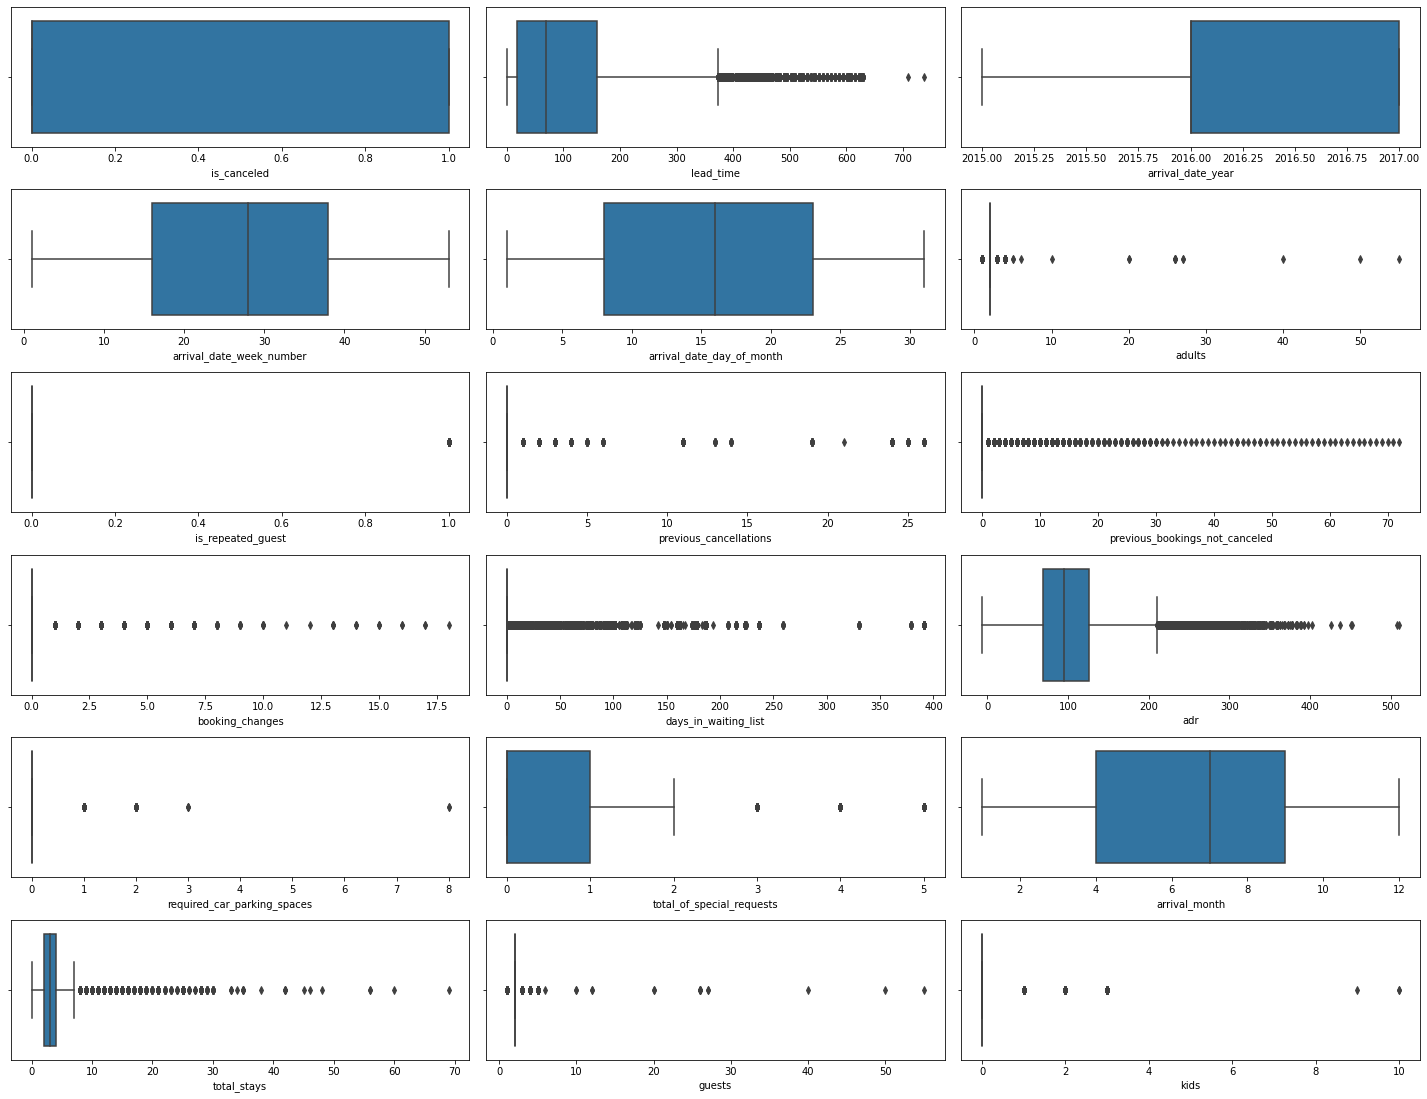

In [39]:
plt.figure(figsize = (20, 20))
x = 1 

for column in df.describe().columns:
    plt.subplot(8,3,x)
    sns.boxplot(df[column])
    x+=1
    
plt.tight_layout()

In [40]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,adults,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,arrival_month,total_stays,guests,kids
count,118986.000000,118986.000000,118986.000000,118986.000000,118986.000000,118986.000000,118986.000000,118986.000000,118986.000000,118986.000000,118986.000000,118986.000000,118986.000000,118986.000000,118986.000000,118986.000000,118986.000000,118986.000000
mean,0.370749,104.071118,2016.156363,27.164263,15.796690,1.862690,0.031550,0.087338,0.137344,0.218522,2.325585,101.963550,0.062654,0.570647,6.552351,3.426017,1.971072,0.108382
std,0.483008,106.891037,0.707745,13.598804,8.781183,0.570062,0.174799,0.845697,1.499533,0.638086,17.614271,48.054154,0.245545,0.792401,3.089352,2.541709,0.719443,0.404479
min,0.000000,0.000000,2015.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.500000,0.000000,0.000000,4.000000,2.000000,2.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,7.000000,3.000000,2.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,9.000000,4.000000,2.000000,0.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,55.000000,1.000000,26.000000,72.000000,18.000000,391.000000,510.000000,8.000000,5.000000,12.000000,69.000000,55.000000,10.000000


In [41]:
df.describe(include = 'O').T

,count,unique,top,freq
hotel,118986,2,City Hotel,78939
arrival_date_month,118986,12,August,13829
meal,118986,4,BB,92019
country,118986,177,PRT,48917
market_segment,118986,8,Online TA,56221
distribution_channel,118986,5,TA/TO,97559
reserved_room_type,118986,9,A,85862
assigned_room_type,118986,11,A,73982
deposit_type,118986,3,No Deposit,104238
customer_type,118986,4,Transient,89336


In [55]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month,arrival_day,month_year,total_stays,guests,kids,lead_time_month
0,Resort Hotel,0,342,2015,July,27,1,2,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0,2.0,0.0,11
1,Resort Hotel,0,737,2015,July,27,1,2,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0,2.0,0.0,24
2,Resort Hotel,0,7,2015,July,27,1,1,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07,1,1.0,0.0,0
3,Resort Hotel,0,13,2015,July,27,1,1,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07,1,1.0,0.0,0
4,Resort Hotel,0,14,2015,July,27,1,2,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,7,Wednesday,2015-07,2,2.0,0.0,0


##Booking Location 

almost half of the booking is made from PRT (Portugal)

since that there's so many unique values from all the countries where the booking comes from we will try to group it into continent or we will group it into booking from portugal (Local) and booking from outside portugal (international) since both of the hotel are in portugal it's kind of make sense to split the booking into international booking or local booking

In [56]:
def country(row):
    if (row['country'] == 'PRT'):
        return 'Local'
    else :
        return 'International'
    
df['booking_location'] = df.apply(country, axis = 1)

In [57]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month,arrival_day,month_year,total_stays,guests,kids,lead_time_month,booking_location
0,Resort Hotel,0,342,2015,July,27,1,2,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0,2.0,0.0,11,Local
1,Resort Hotel,0,737,2015,July,27,1,2,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0,2.0,0.0,24,Local
2,Resort Hotel,0,7,2015,July,27,1,1,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07,1,1.0,0.0,0,International
3,Resort Hotel,0,13,2015,July,27,1,1,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07,1,1.0,0.0,0,International
4,Resort Hotel,0,14,2015,July,27,1,2,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,7,Wednesday,2015-07,2,2.0,0.0,0,International


the goals of creating a new column here so later on we can see how booking location affecting cancellation

##Previous Cancellation

So many of the booking never been cancelled before in this data set.
We will group this into booking that's never been cancelled or have been cancelled before

In [58]:
def cancellation(row):
    if (row['previous_cancellations'] == 0):
        return 0
    else :
        return 1

df['is_previously_cancelled'] = df.apply(cancellation, axis = 1)

In [59]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month,arrival_day,month_year,total_stays,guests,kids,lead_time_month,booking_location,is_previously_cancelled
0,Resort Hotel,0,342,2015,July,27,1,2,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0,2.0,0.0,11,Local,0
1,Resort Hotel,0,737,2015,July,27,1,2,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0,2.0,0.0,24,Local,0
2,Resort Hotel,0,7,2015,July,27,1,1,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07,1,1.0,0.0,0,International,0
3,Resort Hotel,0,13,2015,July,27,1,1,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07,1,1.0,0.0,0,International,0
4,Resort Hotel,0,14,2015,July,27,1,2,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,7,Wednesday,2015-07,2,2.0,0.0,0,International,0


##Booking Changes

Bookings of the customers never change since there are many values of this booking changes column, we will group it in to does the booking ever been changes or not

In [60]:
def changes(row):
    if (row['booking_changes'] == 0):
        return 0
    else :
        return 1

df['is_booking_changes'] = df.apply(changes, axis = 1)

In [61]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month,arrival_day,month_year,total_stays,guests,kids,lead_time_month,booking_location,is_previously_cancelled,is_booking_changes
0,Resort Hotel,0,342,2015,July,27,1,2,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0,2.0,0.0,11,Local,0,1
1,Resort Hotel,0,737,2015,July,27,1,2,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0,2.0,0.0,24,Local,0,1
2,Resort Hotel,0,7,2015,July,27,1,1,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07,1,1.0,0.0,0,International,0,0
3,Resort Hotel,0,13,2015,July,27,1,1,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07,1,1.0,0.0,0,International,0,0
4,Resort Hotel,0,14,2015,July,27,1,2,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,7,Wednesday,2015-07,2,2.0,0.0,0,International,0,0


##Parking Spaces & Cancellation

The customer who need a parking spot for their vehicle actually never cancelled their hotel booking, this could be a good insight for the hotel interm of marketing

In [62]:
def parking(row):
    if (row['required_car_parking_spaces'] < 1):
        return 0
    else :
        return 1
    
df['parking_space'] = df.apply(parking, axis = 1)

In [63]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month,arrival_day,month_year,total_stays,guests,kids,lead_time_month,booking_location,is_previously_cancelled,is_booking_changes,parking_space
0,Resort Hotel,0,342,2015,July,27,1,2,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0,2.0,0.0,11,Local,0,1,0
1,Resort Hotel,0,737,2015,July,27,1,2,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0,2.0,0.0,24,Local,0,1,0
2,Resort Hotel,0,7,2015,July,27,1,1,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07,1,1.0,0.0,0,International,0,0,0
3,Resort Hotel,0,13,2015,July,27,1,1,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07,1,1.0,0.0,0,International,0,0,0
4,Resort Hotel,0,14,2015,July,27,1,2,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,7,Wednesday,2015-07,2,2.0,0.0,0,International,0,0,0


##Booking Location Visualization

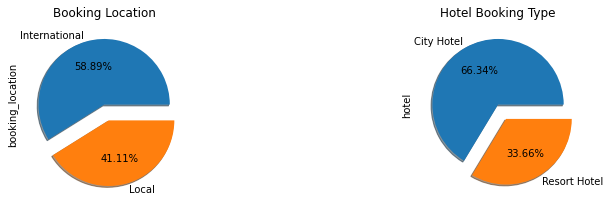

In [64]:
plt.figure(figsize = (10, 5))
plt.subplot(1,3,1)
df['booking_location'].value_counts().plot.pie(explode = [0, 0.25], 
                                               autopct = '%1.2f%%',
                                               shadow = True
                                               )
plt.title('Booking Location')

plt.subplot(1,3,3)
df['hotel'].value_counts().plot.pie(explode = [0, 0.25],
                                 autopct = '%1.2f%%',
                                 shadow = True)
plt.title('Hotel Booking Type')

plt.show()

We can see that more than half of the booking were from outside of the portugal while 41.11 % are from Portugal

##Number of Cancellation Towards The Number of Booking Visualization

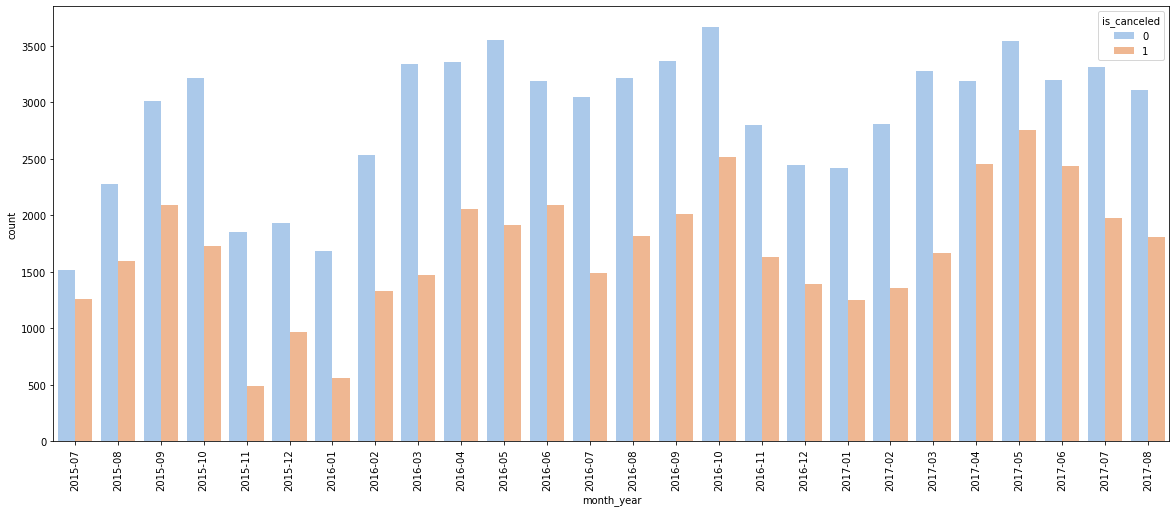

In [65]:
plt.figure(figsize = (20, 8))
sns.countplot(df['month_year'], hue = df['is_canceled'], palette = 'pastel')
plt.xticks(rotation = 90)

plt.show()

as we can see from the chart above the number of cancellation generally goes up as the number of booking goes up. however it doesn't seem number of cancellation has a linear effect towards number of booking. as we can see that there are certain month that has a higher percentage of confirmed booking compared to other months

##Machine Learning Import Modules

In [158]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

from sklearn.datasets import load_boston

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectPercentile
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix,classification_report,f1_score,recall_score,precision_score
from sklearn.metrics import plot_roc_curve,plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, StratifiedKFold



from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn import tree
import graphviz

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.tree import plot_tree
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

##PreProcessing

In [68]:
df['booking_location_encoded'] =df['booking_location'].map({'International':1, 'Local':0})
df['hotel_encoded'] = df['hotel'].map({'City Hotel': 1, 'Resort Hotel':0})

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month,arrival_day,month_year,total_stays,guests,kids,lead_time_month,booking_location,is_previously_cancelled,is_booking_changes,parking_space,booking_location_encoded,hotel_encoded
0,Resort Hotel,0,342,2015,July,27,1,2,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0,2.0,0.0,11,Local,0,1,0,0,0
1,Resort Hotel,0,737,2015,July,27,1,2,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0,2.0,0.0,24,Local,0,1,0,0,0
2,Resort Hotel,0,7,2015,July,27,1,1,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07,1,1.0,0.0,0,International,0,0,0,1,0
3,Resort Hotel,0,13,2015,July,27,1,1,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07,1,1.0,0.0,0,International,0,0,0,1,0
4,Resort Hotel,0,14,2015,July,27,1,2,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,7,Wednesday,2015-07,2,2.0,0.0,0,International,0,0,0,1,0


preprocessing label using .map because there are only 2 unique values

#**4. Model Training**

In [69]:
X = df[['hotel_encoded','booking_location_encoded','lead_time', 'market_segment', 'deposit_type', 'parking_space', 'total_of_special_requests', 'is_previously_cancelled', 'is_repeated_guest', 'is_booking_changes', 'customer_type', 'total_stays', 'guests']]
y = df['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 42)

In [70]:
X_train.head()

,hotel_encoded,booking_location_encoded,lead_time,market_segment,deposit_type,parking_space,total_of_special_requests,is_previously_cancelled,is_repeated_guest,is_booking_changes,customer_type,total_stays,guests
30037,0,1,67,Online TA,No Deposit,0,2,0,0,0,Transient,6,2.0
18686,0,0,15,Corporate,No Deposit,0,0,1,0,0,Transient-Party,2,2.0
25573,0,1,301,Online TA,No Deposit,0,0,0,0,0,Transient,13,2.0
52737,1,1,88,Online TA,No Deposit,0,0,0,0,0,Transient,3,2.0
88311,1,0,56,Complementary,No Deposit,0,0,0,0,0,Transient,1,2.0


In [71]:
cat_columns = ['market_segment','deposit_type','customer_type']
num_columns = ['hotel_encoded','booking_location_encoded','lead_time', 'parking_space', 'total_of_special_requests', 'is_previously_cancelled', 'is_repeated_guest', 'is_booking_changes', 'total_stays', 'guests']

In [103]:
categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder())
])

numerical_pipeline = Pipeline([
    ('scaler', RobustScaler())
])

prepocessor = ColumnTransformer([
    ('categorical',categorical_pipeline,cat_columns),
    ('numerical', numerical_pipeline,num_columns)
])

pipe_logreg = Pipeline([
    ("prep", prepocessor),
    ("algo", LogisticRegression())
])

pipe_KNN = Pipeline([
    ('prep', prepocessor),
    ('algo', KNeighborsClassifier())
])

pipe_DT = Pipeline([
    ("prep", prepocessor),
    ("algo", DecisionTreeClassifier())
])

this is preparring all the the pipeline model to predict all using 3 algorithms and we will hypertune it using the algorithm that we set up as well

##Logistic Regression

In [104]:
pipe_logreg.fit(X_train, y_train)
y_pred_logreg_base =  pipe_logreg.predict(X_test)
y_pred_logreg_base_train = pipe_logreg.predict(X_train)

In [105]:

recall_logreg_base = recall_score(y_test, y_pred_logreg_base)
acc_logreg_base = accuracy_score(y_test, y_pred_logreg_base)
precision_logreg_base = precision_score(y_test, y_pred_logreg_base)
f1_logreg_base = f1_score(y_test, y_pred_logreg_base)
acc_logreg_base_train = accuracy_score(y_train, y_pred_logreg_base_train)

print(f"Training Accuracy : {acc_logreg_base_train}")
print(f"Testing Accuracy : {acc_logreg_base}")

Training Accuracy : 0.802905828465773
Testing Accuracy : 0.8012438020001681


we see here that the model is not over fit nor underfitting using logistic regression model

In [106]:
print(classification_report(y_test, y_pred_logreg_base))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85     14975
           1       0.80      0.62      0.70      8823

    accuracy                           0.80     23798
   macro avg       0.80      0.76      0.77     23798
weighted avg       0.80      0.80      0.79     23798



In [107]:
cm_logreg_base = confusion_matrix(y_test, y_pred_logreg_base, labels = [1,0])
df_logreg_base = pd.DataFrame(data = cm_logreg_base, index = ['actual 1', 'actual 0'], columns = ['Pred 1', 'Pred 0'])
df_logreg_base

,Pred 1,Pred 0
actual 1,5428,3395
actual 0,1335,13640


we see that using logistic regression we have around 1200 ++ false positive in this case (not cancelled booking) thats predicted to be cancelled and we have around 3300 ++ False Negative means (cancelled booking that's considered not cancelled)

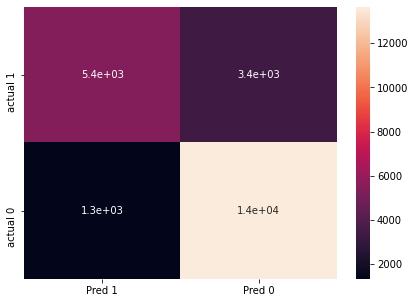

In [108]:
plt.figure(figsize = (7, 5))
sns.heatmap(df_logreg_base, annot = True)

##KNN

In [109]:
pipe_KNN.fit(X_train, y_train)
y_pred_KNN_base =  pipe_KNN.predict(X_test)
y_pred_KNN_base_train = pipe_KNN.predict(X_train)

In [110]:
recall_KNN_base = recall_score(y_test, y_pred_KNN_base)
acc_KNN_base = accuracy_score(y_test, y_pred_KNN_base)
precision_KNN_base = precision_score(y_test, y_pred_KNN_base)
f1_KNN_base = f1_score(y_test, y_pred_KNN_base)
acc_KNN_base_train = accuracy_score(y_train, y_pred_KNN_base_train)

print(f"Training Accuracy : {acc_KNN_base_train}")
print(f"Testing Accuracy : {acc_KNN_base}")

Training Accuracy : 0.8790498802370047
Testing Accuracy : 0.8378014959240272


in KNN model we see that there is overfitting condition in KNN model even though KNN has a better accuracy score compared to logistic Regression we will fix it later on in hyperparameter tuning

In [111]:
print(classification_report(y_test, y_pred_KNN_base))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87     14975
           1       0.80      0.75      0.77      8823

    accuracy                           0.84     23798
   macro avg       0.83      0.82      0.82     23798
weighted avg       0.84      0.84      0.84     23798



In [112]:
cm_KNN_base = confusion_matrix(y_test, y_pred_KNN_base, labels = [1,0])
df_KNN_base = pd.DataFrame(data = cm_KNN_base, index = ['actual 1', 'actual 0'], columns = ['Pred 1', 'Pred 0'])
df_KNN_base

,Pred 1,Pred 0
actual 1,6586,2237
actual 0,1623,13352


compared to logistic regression KNN model has a lower False negative (not cancelled prediction actual  canceled) however it has a higher False Positive (prediction cancelled actual not cancelled)

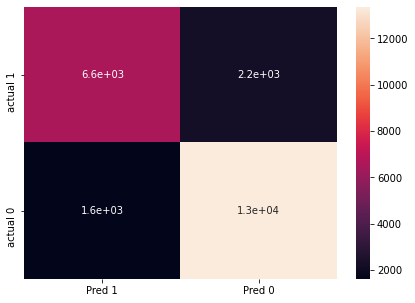

In [113]:
plt.figure(figsize = (7, 5))
sns.heatmap(df_KNN_base, annot = True)

##Decision Tree

In [114]:
pipe_DT.fit(X_train, y_train)
y_pred_DT_base =  pipe_DT.predict(X_test)
y_pred_DT_base_train = pipe_DT.predict(X_train)

In [115]:
recall_DT_base = recall_score(y_test, y_pred_DT_base)
acc_DT_base = accuracy_score(y_test, y_pred_DT_base)
precision_DT_base = precision_score(y_test, y_pred_DT_base)
f1_DT_base = f1_score(y_test, y_pred_DT_base)
acc_DT_base_train = accuracy_score(y_train, y_pred_DT_base_train)

print(f"Training Accuracy : {acc_DT_base_train}")
print(f"Testing Accuracy : {acc_DT_base}")

Training Accuracy : 0.9415997814850612
Testing Accuracy : 0.8319606689637785


we see that there's overfitting condition in Decision Tree as well, however we will try to adjust the parameter to prevent the overfitting condition

In [116]:
print(classification_report(y_test, y_pred_DT_base))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87     14975
           1       0.79      0.74      0.77      8823

    accuracy                           0.83     23798
   macro avg       0.82      0.81      0.82     23798
weighted avg       0.83      0.83      0.83     23798



In [117]:
cm_DT_base = confusion_matrix(y_test, y_pred_DT_base, labels = [1,0])
df_DT_base = pd.DataFrame(data = cm_DT_base, index = ['actual 1', 'actual 0'], columns = ['Pred 1', 'Pred 0'])
df_DT_base

,Pred 1,Pred 0
actual 1,6559,2264
actual 0,1735,13240


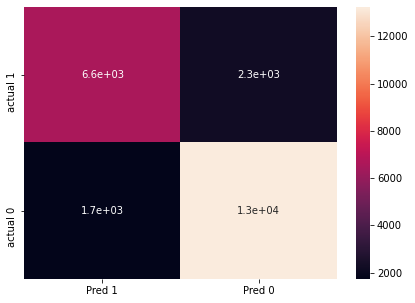

In [118]:
plt.figure(figsize = (7, 5))
sns.heatmap(df_DT_base, annot = True)

##Evaluation Comparing Each Models Evaluation Matrix

In [119]:
from IPython.core.display import display, HTML

def display_side_by_side(dfs:list, captions:list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

In [120]:
evaluation_matrix_base = {
    'LogReg': [acc_logreg_base, recall_logreg_base, precision_logreg_base, f1_logreg_base],
    'KNN':[acc_KNN_base,recall_KNN_base,precision_KNN_base, f1_KNN_base],
    'DecTree':[acc_DT_base, recall_DT_base, precision_DT_base, f1_DT_base],

}

eva_base = pd.DataFrame(data = evaluation_matrix_base, index = ['Accuracy', 'Recall', 'Precision', 'F1 Score'])

evaluation_matrix_base_training = {
    "training" : [acc_logreg_base_train, acc_KNN_base_train, acc_DT_base_train],
    "testing": [acc_logreg_base, acc_KNN_base, acc_DT_base]
}
    

eva_base_train = pd.DataFrame(data = evaluation_matrix_base_training, index = ['LogReg', 'KNN', 'DecTree'])

display_side_by_side([eva_base, eva_base_train], ['Evaluation Matrix', 'Accuracy Train & Test'])

we see that from the evaluation matrix Decision Tree has the highest score in training, however we see that it has an overfitting condition same goes to KNN it also have an overfitting condition 

##Matrix Figure For All The Chart 

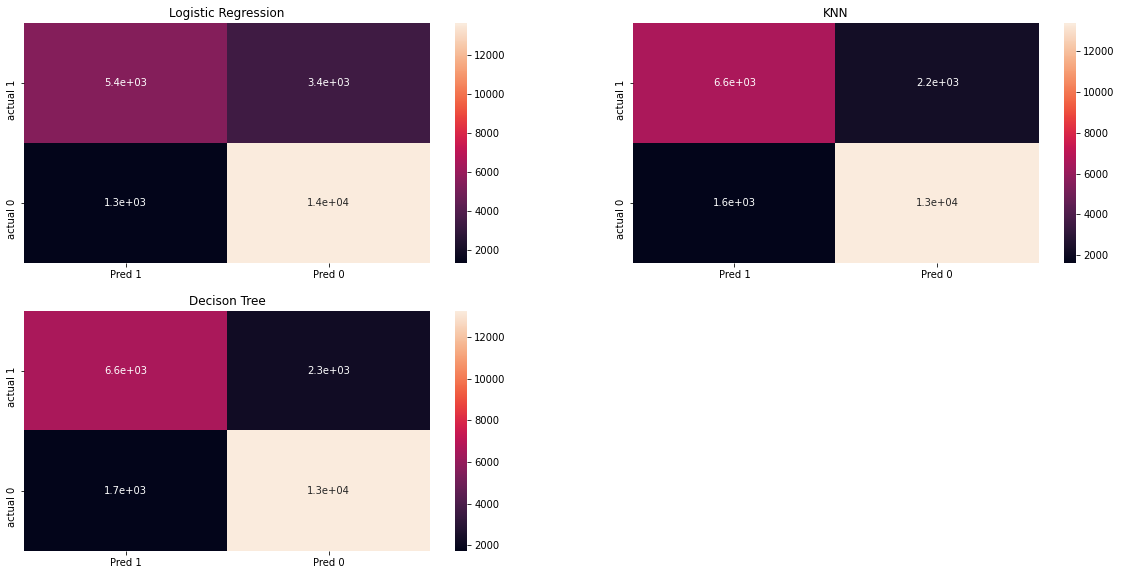

In [121]:
plt.figure(figsize = (20, 15))

plt.subplot(3,2,1)
sns.heatmap(df_logreg_base, annot=True)
plt.title("Logistic Regression")

plt.subplot(3,2,2)
sns.heatmap(df_KNN_base, annot = True)
plt.title('KNN')

plt.subplot(3,2,3)
sns.heatmap(df_DT_base, annot = True)
plt.title('Decison Tree')

plt.show()

##Testing With New Data

In [127]:
data_arif = {
    "nama" : "Arif",
    "Sex" : "male",
    "Age" : 28,
    "hotel_encoded" : 1,
    "booking_location_encoded" : 1,
    "lead_time" : 200,
    "market_segment" : "Direct",
    'deposit_type': 'No Deposit',
    'parking_space':1,
    'total_of_special_requests':1,
    'is_previously_cancelled':1,
    'is_repeated_guest':0,
    'is_booking_changes':0,
    'customer_type':'Transient',
    'total_stays': 2,
    'guests': 2.0,
    "Email" : "arif@gmail.com"
}

arif = pd.DataFrame(data = data_arif, index = [1])
pipe_logreg.predict_proba(arif)

array([[0.98668049, 0.01331951]])

we see that our model could predict new data that's outside the training and testing set. We use Logistic Regression and predict proba in this case, we that arif is 98.6% will likely to confirmed booking

# **5. Evaluation, Model Selection, and Model Tuning**

In [166]:
pipe_logreg.get_params()

{'algo': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 'algo__C': 1.0,
 'algo__class_weight': None,
 'algo__dual': False,
 'algo__fit_intercept': True,
 'algo__intercept_scaling': 1,
 'algo__l1_ratio': None,
 'algo__max_iter': 100,
 'algo__multi_class': 'auto',
 'algo__n_jobs': None,
 'algo__penalty': 'l2',
 'algo__random_state': None,
 'algo__solver': 'lbfgs',
 'algo__tol': 0.0001,
 'algo__verbose': 0,
 'algo__warm_start': False,
 'memory': None,
 'prep': ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                   transformer_weights=None,
                   transformers=[('categorical',
                                  Pipeline(memory=None,
                                

In [187]:
pipe_DT.get_params()

{'algo': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
 'algo__ccp_alpha': 0.0,
 'algo__class_weight': None,
 'algo__criterion': 'gini',
 'algo__max_depth': None,
 'algo__max_features': None,
 'algo__max_leaf_nodes': None,
 'algo__min_impurity_decrease': 0.0,
 'algo__min_impurity_split': None,
 'algo__min_samples_leaf': 1,
 'algo__min_samples_split': 2,
 'algo__min_weight_fraction_leaf': 0.0,
 'algo__presort': 'deprecated',
 'algo__random_state': None,
 'algo__splitter': 'best',
 'memory': None,
 'prep': ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                   transformer_w

In [188]:
pipe_KNN.get_params()

{'algo': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                      weights='uniform'),
 'algo__algorithm': 'auto',
 'algo__leaf_size': 30,
 'algo__metric': 'minkowski',
 'algo__metric_params': None,
 'algo__n_jobs': None,
 'algo__n_neighbors': 5,
 'algo__p': 2,
 'algo__weights': 'uniform',
 'memory': None,
 'prep': ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                   transformer_weights=None,
                   transformers=[('categorical',
                                  Pipeline(memory=None,
                                           steps=[('encoder',
                                                   OneHotEncoder(categories='auto',
                                                                 drop=None,
                                                                 dtype=<class 'numpy.float64'>,
                                

#**6. Result, Conclusion, and Recommendation**

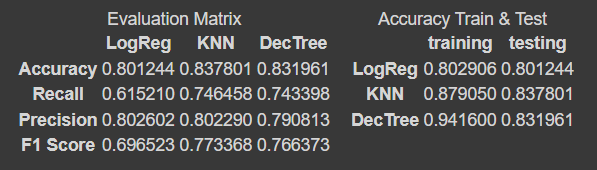

##*Decision Tree Has The Best Accuracy Among All Algorithm That We Tried*

From all the evaluation matrix to predict hotel cancellation classification case, we see that Decision Tree has the best accuracy when it comes to predicting hotel cancellation based on certain features



##*Overfitting*

KNN & Decision Tree both have overfitting condition in base model

##*Using Accuracy As The Primary Evaluation Metrics*

The First Reason Why Accuracy is used as the evaluation metric here because we have somehow a balance data 63 % Confirmed Booking and 37% Canceled Booking in this case our dataset is balance and hence using accuracy is acceptable in this case

in this case every class is equally important

##*Conclusions*

this model will allow hotel managers / revenue manager to take actions on bookings that's identified as "potentially going to be canceled", furthermore the development of these model should contribute to hotel revenue management.

These prediction models enable hotel managers to mitigate revenue loss derived from booking cancellations and to mitigate the risks associated with overbooking (reallocation costs, cash or service compensations, and, particularly important today, social reputation costs). Booking cancellations models also allow hotel managers to implement less rigid cancellation policies, without increasing uncertainty. This has the potential to translate into more sales, since less rigid cancellation policies generate more bookings